In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

FILE = 'data.csv'
df = pd.read_csv(FILE)

In [2]:
df.head()

,message,fingers,tail,species
0,pluvia arbor aquos,4,no,Aquari
1,cosmix xeno nebuz odbitaz,5,yes,Zorblax
2,solarix glixx novum galaxum quasar,5,yes,Zorblax
3,arbor insectus pesros ekos dootix nimbus,2,yes,Florian
4,mermax drakos lorix epikoz deftax,4,no,Faerix


<Axes: xlabel='species', ylabel='message_length'>

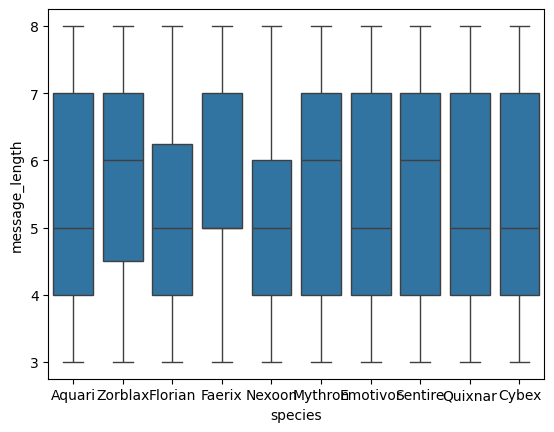

In [3]:
# columns are message, fingers, tail, and species
# species is the target variable
# message is a sentence with words not in the dictionary

# let's see if we can find any patterns in the data
# let's start with the number of words in the message

analytics_df = df.copy()
analytics_df['message_length'] = analytics_df['message'].apply(lambda x: len(x.split()))
sns.boxplot(x='species', y='message_length', data=analytics_df)

In [8]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable
label_encoder = LabelEncoder()
df['species_encoded'] = label_encoder.fit_transform(df['species'])

# Verify encoding
print(df[['species', 'species_encoded']].head())

   species  species_encoded
0   Aquari                0
1  Zorblax                9
2  Zorblax                9
3  Florian                4
4   Faerix                3


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features based on your data
X = tfidf_vectorizer.fit_transform(df['message'])

# Target variable
y = df['species_encoded']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize Logistic Regression model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on test data
y_pred = log_reg.predict(X_test)

# Evaluate model
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

      Aquari       0.50      0.44      0.47         9
       Cybex       0.56      0.82      0.67        11
    Emotivor       0.57      0.73      0.64        11
      Faerix       0.33      0.33      0.33         9
     Florian       0.55      0.60      0.57        10
     Mythron       0.40      0.40      0.40        10
      Nexoon       0.50      0.22      0.31         9
     Quixnar       0.57      0.67      0.62        12
     Sentire       0.50      0.33      0.40         9
     Zorblax       0.50      0.40      0.44        10

    accuracy                           0.51       100
   macro avg       0.50      0.49      0.48       100
weighted avg       0.50      0.51      0.50       100



c:\Users\rishi\anaconda3\envs\image_gen\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [11]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate model
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

      Aquari       0.44      0.44      0.44         9
       Cybex       0.55      0.55      0.55        11
    Emotivor       0.54      0.64      0.58        11
      Faerix       0.42      0.56      0.48         9
     Florian       0.50      0.50      0.50        10
     Mythron       0.43      0.30      0.35        10
      Nexoon       0.44      0.44      0.44         9
     Quixnar       0.43      0.50      0.46        12
     Sentire       0.43      0.33      0.38         9
     Zorblax       0.25      0.20      0.22        10

    accuracy                           0.45       100
   macro avg       0.44      0.45      0.44       100
weighted avg       0.44      0.45      0.44       100



In [13]:
from sklearn.model_selection import GridSearchCV

# Set up the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize the GridSearch
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)

# Fit the GridSearch model
grid_search.fit(X_train, y_train)

# Best parameters
print(grid_search.best_params_)

# Evaluate the tuned model
y_pred_tuned = grid_search.predict(X_test)
print(classification_report(y_test, y_pred_tuned, target_names=label_encoder.classes_))


Fitting 3 folds for each of 27 candidates, totalling 81 fits
{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}
              precision    recall  f1-score   support

      Aquari       0.55      0.67      0.60         9
       Cybex       0.55      0.55      0.55        11
    Emotivor       0.53      0.82      0.64        11
      Faerix       0.44      0.44      0.44         9
     Florian       0.62      0.50      0.56        10
     Mythron       0.50      0.50      0.50        10
      Nexoon       0.50      0.44      0.47         9
     Quixnar       0.44      0.58      0.50        12
     Sentire       0.33      0.11      0.17         9
     Zorblax       0.29      0.20      0.24        10

    accuracy                           0.49       100
   macro avg       0.47      0.48      0.47       100
weighted avg       0.48      0.49      0.47       100



In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Predict on test data
y_pred_nn = model.predict(X_test)
y_pred_nn_classes = y_pred_nn.argmax(axis=1)

# Evaluate
print(classification_report(y_test, y_pred_nn_classes, target_names=label_encoder.classes_))


c:\Users\rishi\anaconda3\envs\image_gen\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.1263 - loss: 2.2919 - val_accuracy: 0.2800 - val_loss: 2.2831
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2017 - loss: 2.2744 - val_accuracy: 0.2800 - val_loss: 2.2630
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2269 - loss: 2.2506 - val_accuracy: 0.3700 - val_loss: 2.2311
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2523 - loss: 2.2139 - val_accuracy: 0.4200 - val_loss: 2.1822
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3259 - loss: 2.1562 - val_accuracy: 0.4300 - val_loss: 2.1088
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4071 - loss: 2.0739 - val_accuracy: 0.4600 - val_loss: 2.0005
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5576 - loss: 1.9064 - val_accuracy: 0.5000 - val_loss: 1.8471
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4421 - loss: 1.7994 - val_accuracy: 0.5200 - v

c:\Users\rishi\anaconda3\envs\image_gen\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rishi\anaconda3\envs\image_gen\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rishi\anaconda3\envs\image_gen\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Example dataset
sentences = df['message'].values
labels = df['species_encoded'].values

# Initialize a tokenizer and fit on the text data
tokenizer = Tokenizer(oov_token="<OOV>")  # OOV token for out of vocabulary words
tokenizer.fit_on_texts(sentences)

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(sentences)

# Pad sequences to ensure uniform length
max_length = max([len(seq) for seq in sequences])  # Find the max length of any sentence
X = pad_sequences(sequences, padding='post', maxlen=max_length)

# Check the shape of input data
print("Shape of X:", X.shape)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Vocabulary size (based on the tokenizer)
vocab_size = len(tokenizer.word_index) + 1  # +1 for padding token

# Define the embedding dimension (the size of the embedding vectors)
embedding_dim = 50  # You can tune this value (e.g., 50, 100, 300)

# Build the model
model = Sequential()

# Add an embedding layer. The input_dim is vocab_size, and the output_dim is the embedding dimension.
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))

# Add LSTM layer (or you can use GRU)
model.add(LSTM(128, return_sequences=False))  # You can tune the number of units

# Add a dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Add the final output layer. Use `softmax` for multiclass classification.
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary of the model
model.summary()

Shape of X: (500, 8)


c:\Users\rishi\anaconda3\envs\image_gen\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42, stratify=labels)

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.1133 - loss: 2.2999 - val_accuracy: 0.2300 - val_loss: 2.2910
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2799 - loss: 2.2767 - val_accuracy: 0.3000 - val_loss: 2.2490
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3425 - loss: 2.1928 - val_accuracy: 0.3700 - val_loss: 1.9319
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4214 - loss: 1.6726 - val_accuracy: 0.5100 - val_loss: 1.1785
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5631 - loss: 1.0538 - val_accuracy: 0.5200 - val_loss: 0.8096
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5477 - loss: 0.8185 - val_accuracy: 0.4900 - val_loss: 0.7880
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5818 - loss: 0.7170 - val_accuracy: 0.5100 - val_loss: 0.8195
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5633 - loss: 0.7038 - val_accuracy: 0.4900 - v

In [17]:
from sklearn.metrics import classification_report

# Make predictions
y_pred = model.predict(X_test)

# Convert probabilities to class predictions
y_pred_classes = y_pred.argmax(axis=1)

# Evaluate the model using classification report
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step
              precision    recall  f1-score   support

      Aquari       0.50      0.78      0.61         9
       Cybex       0.47      0.64      0.54        11
    Emotivor       0.67      0.55      0.60        11
      Faerix       0.62      0.56      0.59         9
     Florian       0.60      0.30      0.40        10
     Mythron       0.60      0.60      0.60        10
      Nexoon       0.43      0.33      0.38         9
     Quixnar       0.62      0.42      0.50        12
     Sentire       0.55      0.67      0.60         9
     Zorblax       0.46      0.60      0.52        10

    accuracy                           0.54       100
   macro avg       0.55      0.54      0.53       100
weighted avg       0.55      0.54      0.53       100

